In [6]:
! pip3 install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.0 MB/s eta 0:00:00a 0:00:01


In [1]:
import sys
sys.path.append('./qdarts')

from qdarts.experiment import Experiment
from qdarts.plotting import plot_polytopes



import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import utilities.config as c
import utilities.utils  as u
#import torch


In [101]:
# Define the system
c.set_global_K(3)
C_DD, C_DG = u.generate_capacitance_matrices()
tcs = np.zeros((c.K,c.K))
#All capacitances are given in aF
N = 3 #number of dots   

C_DG[0:2,0] /= 10
C_DG[0:2,1] /= 10
# Definition of the tunnel couplings in eV 
# NOTE: we use the convention that tc is the energy gap at avoided crossing H = tc/2 sx
tunnel_couplings = np.zeros((N,N))
tunnel_couplings[0,1] = 50*1e-6
tunnel_couplings[1,0] = 50*1e-6

In [102]:
C_DG

array([[ 0.92677769,  0.08721563,  0.98296426],
       [ 0.10204479,  0.88903077,  1.11260767],
       [ 1.05452317,  1.00292767, 16.46121578]])

In [103]:

capacitance_config = {
        "C_DD" : C_DD,  #dot-dot capacitance matrix
        "C_Dg" : C_DG,  #dot-gate capacitance matrix
        "ks" : None,       #distortion of Coulomb peaks. NOTE: If None -> constant size of Coublomb peak 
}

tunneling_config = {
        "tunnel_couplings": tunnel_couplings, #tunnel coupling matrix
        "temperature": 0.2,                   #temperature in Kelvin
        "energy_range_factor": 5,  #energy scale for the Hamiltonian generation. NOTE: Smaller -> faster but less accurate computation 
}

sensor_config = {
        "sensor_dot_indices": [2],  #Indices of the sensor dots
        "sensor_detunings": [-0.002],  #Detuning of the sensor dots
        "noise_amplitude": {"fast_noise": 0.8*1e-6, "slow_noise": 1e-8}, #Noise amplitude for the sensor dots in eV
        "peak_width_multiplier": 15,  #Width of the sensor peaks in the units of thermal broadening m *kB*T/0.61.
}

In [104]:
experiment = Experiment(capacitance_config=capacitance_config, 
                        tunneling_config=tunneling_config, 
                        sensor_config=sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[12.04426693  0.92136943  0.92136943]
 [ 0.92136943 11.94473274  0.92136943]
 [ 0.92136943  0.92136943 19.44003606]]
                Dot-gate capacitances: 
                [[ 0.92677769  0.08721563  0.98296426]
 [ 0.10204479  0.88903077  1.11260767]
 [ 1.05452317  1.00292767 16.46121578]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: [2]
            Sensor detunings: [-2.] meV
            Coulomb peak width: 0.82 meV
            Slow noise amplitude: 0.01 ueV
            Fast noise amplitude: 0.8 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.e+00 5.e-05 0.e+00]
 [5.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 

In [105]:
experiment = Experiment(capacitance_config=capacitance_config, 
                        tunneling_config=tunneling_config, 
                        sensor_config=sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[12.04426693  0.92136943  0.92136943]
 [ 0.92136943 11.94473274  0.92136943]
 [ 0.92136943  0.92136943 19.44003606]]
                Dot-gate capacitances: 
                [[ 0.92677769  0.08721563  0.98296426]
 [ 0.10204479  0.88903077  1.11260767]
 [ 1.05452317  1.00292767 16.46121578]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: [2]
            Sensor detunings: [-2.] meV
            Coulomb peak width: 0.82 meV
            Slow noise amplitude: 0.01 ueV
            Fast noise amplitude: 0.8 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.e+00 5.e-05 0.e+00]
 [5.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 

In [110]:
xexp, yexp, _, polytopesexp, sensor_signalexp, _ = experiment.generate_CSD(
                                                plane_axes = np.array([[1,0,0],[0,1,0]]), # vectors spanning the cut in voltage space
                                                target_state = [1,0,5],  # target state for transition
                                                target_transition = [-1,1,0], #target transition from target state, here transition to [2,3,2,3,5,5]
                                                x_voltages=np.linspace(-0.02, 0.2, 100), #voltage range for x-axis
                                                y_voltages=np.linspace(-0.02, 0.2, 100), #voltage range for y-axis
                                                compute_polytopes = True,
                                                compensate_sensors=True, #compensate the sensors
                                                 #compute the corners of constant occupation
                                                use_sensor_signal=True) #use the sensor signals

v_offset found: [0.03659557 0.03046031]


(<Figure size 256x256 with 1 Axes>, <Axes: >)

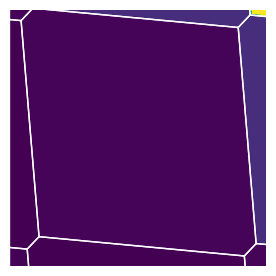

In [111]:
%matplotlib inline
u.plot_CSD(xexp, yexp, sensor_signalexp[:,:,0], polytopesexp)


In [8]:
plot

<Figure size 256x256 with 1 Axes>

In [7]:
ax

<Axes: >